# Assignment 2.

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2021/wiki/Assignment-1-and-2) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday April 5th, 2021 at 23:55. Hand in your files via [`http://peergrade.io`](http://peergrade.io/).

**Peergrading date and time**: _Remember that after handing in you have a week to evaluate a few assignments written by other members of the class_. Thus, the peer evaluations are due on Monday April 12th, 2021 at 23:55. 

## Part 1: Questions to text and lectures.

### A) Please answer my questions to the Segal and Heer paper we read during lecture 7 and 8.

**What is the *Oxford English Dictionary's* defintion of a narrative?**

Narrative is “an account of a series of events, facts, etc., given in order and with the establishing of connections between them.”

**What is your favorite visualization among the examples in section 3? Explain why in a few words.**

Afghanistan: Behind the Front Line

The province map and colour encoding make the whole visual chart very intuitive and organised. There are three main blocks of user interaction throughout the chart, the content tab in the top left corner, the timeline slider key and the country selection on the right, with the sliding filter time being user friendly to interact with. This case presents the data The structure is presented very clearly and objectively, but the narrative that is wanted to be presented is not clear enough and needs to be supported by other means (presentation, text, etc.)

**What's the point of Figure 7?**

Figure 7 analyses the design features of 58 visualisation cases in different scenarios (magazine, comic, slide, etc.) to discover the categories of narrative visualisation that converge. The diagram shows the results of the analysis. These categories include visual structuring , highlighting, transition guidance, etc. Each category contains a set of visual features, which are assessed for each case and marked with colours and symbols.

**Use Figure 7 to find the most common design choice within each category for the Visual narrative and Narrative structure (the categories within visual narrative are 'visual structuring', 'highlighting', etc).**

* Visual Structuring: Consistent Visual Platform

* Highlighting: Feature Distinction

* Transition Guidance: Object Continuity

* Ordering: User Directed Path

* Interactivity: Filtering / Selection / Search

* Messaging: Captions / Headlines

**Check out Figure 8 and section 4.3. What is your favorite genre of narrative visualization? Why? What is your least favorite genre? Why?**

I prefer a partitioned poster, which is a visualisation that includes images, charts and explanatory text. The images capture the viewer's attention and convey the theme of the visualisation, and as the viewer moves to the adjacent charts, the data structure and key points of interest can be further demonstrated. The lack of a clear line of demarcation between the different modules provides a seamless transition for the viewer to take in the information. This type of visualisation is well suited to magazines and static web pages.

The comic strip is the type of genre I like the least, it is the lowest in terms of its presentation of data complexity. Although it can be impressive, a good comic strip requires a lot of creativity and appeal.

### B) Also please answer the questions to my talk on [explanatory data visualization](https://www.youtube.com/watch?v=yHKYMGwefso)

**What are the three key elements to keep in mind when you design an explanatory visualization?**

* Start with a question: Finding the content you want to communicate to your audience.
* Allow exporation: Interaction allows audiences to feel more engaged and explore the information they care about in their own way.
* Know your readers: Depending on the audience's understanding of the data and what they want to get out of it, choose the proper chart and interpret it appropriately.

**In the video I talk about (1) *overview first*,  (2) *zoom and filter*,  (3) *details on demand*.**
  - Go online and find a visualization that follows these principles (don't use one from the video). 
  - Explain how it does achieves (1)-(3). It might be useful to use screenshots to illustrate your explanation.
  



(1)The visualisation chart shows the world's largest data breaches and hacks, with each bubble being one company's event and the data being the number of breaches that determine the size of the bubble.

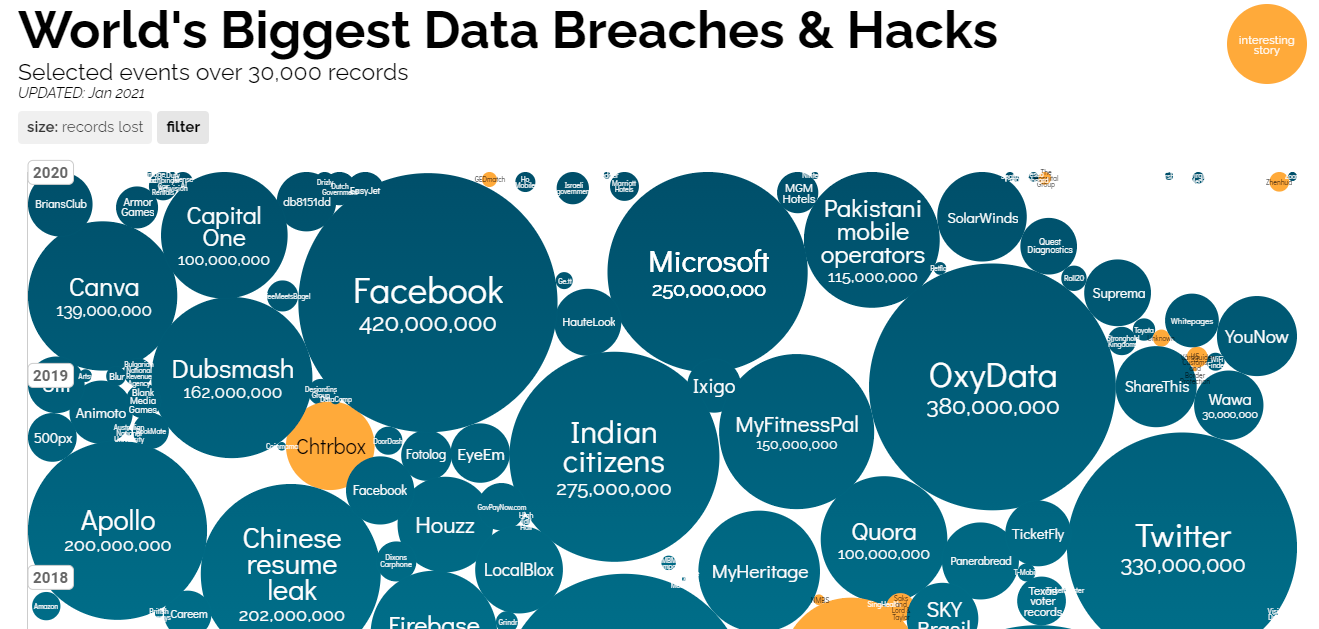

(2)The filter button in the top left corner allows you to select a company category and method. The entire page is arranged in reverse chronological order, with the timeline on the far left.

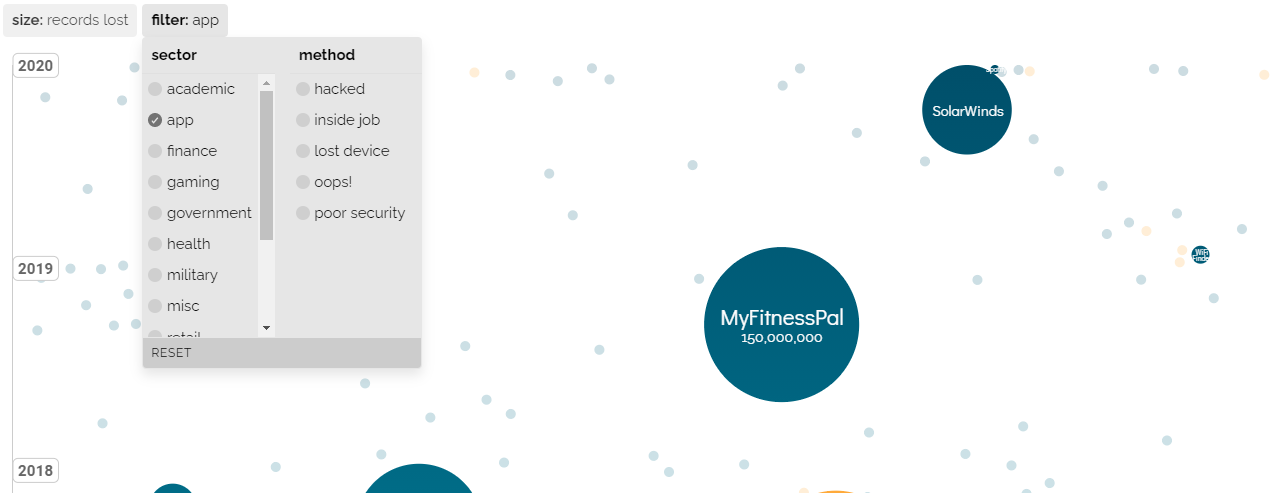

(3)Mouse-over bubbles show the details of the events, and clicking on them links to the relevant news page.

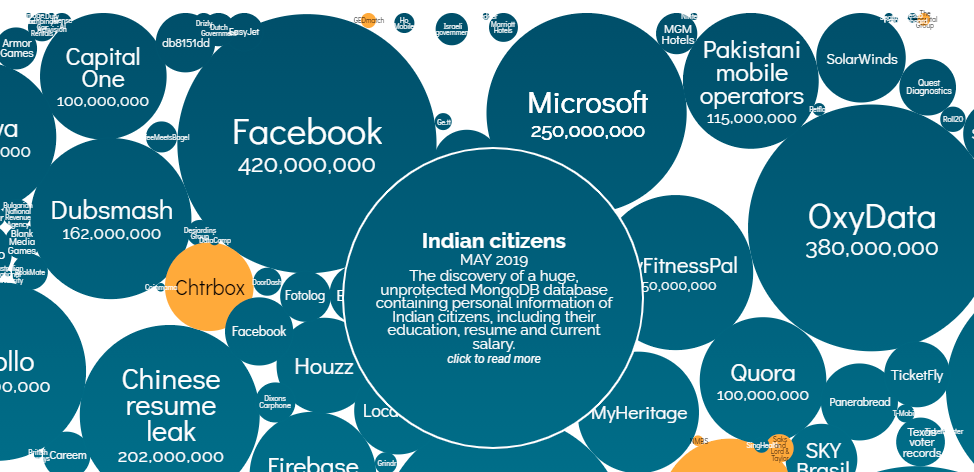

**Explain in your own words: How is explanatory data analysis different from exploratory data analysis?**

 - Exploratory data analysis is about understanding the data and identifying the gems that are of interest and presenting them to others.
 - Explanatory data analysis is about presenting the highlights found in exploratory analysis in a way that the audience can understand.

## Part 2: Random forest and weather

The aim here is to recreate the work you did in Part 1-3 of the Week 7 lecture. I've phrased things differently relative to the exercise to make the purpose more clear. 

Part 2A: Random forest binary classification. 
* Using the and instructions and material from Week 7, build a *random forest* classifier to distinguish between two types (you choose) of crime using on spatio-temporal (where/when) features of data describing the two crimes. When you're done, you should be able to give the classifier a place and a time, and it should tell you which of the two  types of crime happened there.
  - Explain about your choices for training/test data, features, and encoding. (You decide how to present your results, but here are some example topics to consider: Did you balance the training data? What are the pros/cons of balancing? Do you think your model is overfitting? Did you choose to do cross-validation? Which specific features did you end up using? Why? Which features (if any) did you one-hot encode? Why ... or why not?))
  - Report accuracy. Discuss the model performance.
  
  
Part 2B: Info from weather features.
* Now add features from weather data to your random forest. 
  - Report accuracy. 
  - Discuss how the model performance changes relative to the version with no weather data.
  - Discuss what you have learned about crime from including weather data in your model.

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import folium
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

## Part 2A 

#### Random forest of two crime types:


#### Explain about your choices for training/test data, features, and encoding.

The two crime types chosen for this part of the assignment are VEHICLE THEFT and FRAUD

The test and training data is chosen using the build in function train_test_split in sklearn and in order to make it random the random level has been set to 42. The features for the first part of the exercise is only the ones that tells "where" and "when" the crimes has been occuring. 

The features here are: 
-  Month
-  Hours
-  DayOfWeek
-  PdDistrict_	

Where PdDistrict_ is the interger representation of the districts. This transformation enables the processing of categorical data. The occurance of two types of crimes are not equally in size therefore the data has been balanced out by choosing same amount of data observations from each category, here we chose 4000 samples from each category. The reason for balancing the data is for ensuring both crimes can be equally represented. 

As it can be difficult to choose hyperparameters during training of the random forest. RandomizedSearchCV has been used as a guidance for getting the initial hyperparameters. Due to randomness, the code is pasted here, but the hyperparamters will differ from each run time. Then narrowing down to some specific paramters then use GridSearchCV to find the final hyperparamters to use from there. In order to avoid the overfitting, the max depth has been set to 14 and min number of samples leaves has been set to 10. (see the code below)

No further cross validation has been added to random forest, as the algorithm is already randomizing the data for each estimation, then cross validation might not be able to improve the performance of the model. 

In [3]:
# load crime data and select two crime types:
crimes =  pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv", usecols=["Category", "Date", "Time", "PdDistrict"]) ## specify any columns you need
crimes = crimes[crimes["Category"].isin(['VEHICLE THEFT', 'FRAUD'])] # filter out the dataframe, you can plug any list of crimes

# time shift of 7 hours
crimes["datetime"] = crimes.apply(lambda x: pd.to_datetime(x.Date + " " + x.Time).round("H").tz_localize("ETC/GMT-7"), axis = 1) 

data = crimes

In [4]:
# load weather data
weather = pd.read_csv("weather_data.csv", parse_dates=["date"],
                date_parser=lambda x: pd.to_datetime(x).tz_convert(None).tz_localize("Etc/GMT+3").tz_convert("Etc/GMT-7"))


In [6]:
# extracting  DayOfWeek column and do and one hot encoding the PD-distrct 

data['Month']=pd.DatetimeIndex(data['Date']).month
# Finding the hours the crime happend 
data['Hours'] = pd.DatetimeIndex(data['Time']).hour

data['DayOfWeek'] = pd.DatetimeIndex(data['Date']).dayofweek

le = preprocessing.LabelEncoder()
le.fit(data.PdDistrict)
data['PdDistrict_'] = le.transform(data.PdDistrict)
#PdDistrict = pd.get_dummies(data.PdDistrict, prefix='PdDistrict')
#data = pd.concat([data, PdDistrict], axis=1)
data.head()


,Category,Date,Time,PdDistrict,datetime,Month,Hours,DayOfWeek,PdDistrict_
0,VEHICLE THEFT,02/15/2004,02:00,SOUTHERN,2004-02-15 02:00:00+07:00,2,2,6,7
4,VEHICLE THEFT,07/29/2005,21:00,INGLESIDE,2005-07-29 21:00:00+07:00,7,21,4,2
5,FRAUD,10/08/2013,21:11,PARK,2013-10-08 21:00:00+07:00,10,21,1,5
53,FRAUD,04/15/2010,15:13,SOUTHERN,2010-04-15 15:00:00+07:00,4,15,3,7
54,VEHICLE THEFT,04/09/2004,23:00,NORTHERN,2004-04-09 23:00:00+07:00,4,23,4,4


In [131]:
# concatenate two crime data and encode y - labels as one and zeros 

data_VT = data[data.Category == 'VEHICLE THEFT']
data_fraud = data[data.Category == 'FRAUD']

data_vt = data_VT.drop(['datetime','Category', 'Date', 'Time', 'PdDistrict'], axis = 1)
data_f = data_fraud.drop(['datetime','Category', 'Date', 'Time', 'PdDistrict'], axis = 1)
size = 40000
data_vt = data_vt.sample(n = size, random_state = 1)
data_f = data_f.sample(n = size, random_state = 1)

data_f['y'] = np.ones(size)
data_vt['y'] = np.zeros(size)

df  = pd.concat([data_f, data_vt])
df = df.sample(frac=1).reset_index(drop=True)
#df = df.reset_index()
df.head()

,Month,Hours,DayOfWeek,PdDistrict_,y
0,5,9,2,4,0.0
1,7,6,1,4,1.0
2,1,19,1,2,0.0
3,5,12,1,7,1.0
4,5,16,3,3,0.0


In [ ]:
## Random search CV 

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

model = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = model, 
                               param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
# fit the model: 
rf_random.fit(X_train, y_train)
# getting the best paramters: 
rf_random.best_params_

Based on the best parameters, we will narrow down to some of the 

In [ ]:
model = RandomForestClassifier(random_state=42, criterion = 'gini', bootstrap=True, max_features ='sqrt')

param_grid = { 
    'n_estimators': [300, 400, 600],
    'min_samples_leaf': [2,5,7],
    'min_samples_split': [2,4,6],
    'max_depth': [5,7,10,15]
    
}
CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 3, n_jobs = -1, verbose = 2)

# fit the model:
CV_rfc.fit(X_train, y_train)

# best parameters:
CV_rfc.best_params_


The outputs are then:

{'max_depth': 14,

 'min_samples_leaf': 10,
 
 'min_samples_split': 10,
 
 'n_estimators': 300}

##### Using the best parameters to fit the modesl from here

In [133]:
# split data into test and train:
y = df['y']
X = df.drop(['y'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [134]:
model = RandomForestClassifier(bootstrap = True, 
                               n_estimators= 300, 
                               min_samples_split = 10,
                               max_depth = 14, min_samples_leaf= 10)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.6800757575757576

#### Discussion: 
The performance of this model is 68 % based on the features (Month, Hours, DayOfWeek, PdDistrict_) The performance is acceptable since it is above 50% but as we are only using some date-features and district here, it is not sufficient to distingush two crimes perfectly from each other. 

## Part 2B Joining Weather

In order to compare performance, the hyperparameters are reused from part 2A. The weather_ is integer representation of the the weather types. it has been obtained using LabelEncoder from sklearn.  

In [97]:
# label encode the weather: 

le = preprocessing.LabelEncoder()
le.fit(weather.weather)
weather['weather_'] = le.transform(weather.weather)
weather = weather.rename(columns ={'date': 'datetime'}, inplace = False)
weather.head()

,datetime,temperature,humidity,weather,wind_speed,wind_direction,pressure,weather_
0,2012-10-01 23:00:00+07:00,16.330000,88.0,light rain,2.0,150.0,1009.0,10
1,2012-10-02 00:00:00+07:00,16.324993,87.0,sky is clear,2.0,147.0,1009.0,20
2,2012-10-02 01:00:00+07:00,16.310618,86.0,sky is clear,2.0,141.0,1009.0,20
3,2012-10-02 02:00:00+07:00,16.296243,85.0,sky is clear,2.0,135.0,1009.0,20
4,2012-10-02 03:00:00+07:00,16.281869,84.0,sky is clear,2.0,129.0,1009.0,20


In [98]:
# merge weather data
df_all = pd.merge(df,weather, how='inner', on=['datetime'])

The features used for classification are (Month,	Hours,	DayOfWeek,	PdDistrict_,	temperature,	humidity ,wind_speed,	pressure,	weather_). 

In [126]:
# dropping nan values: 
df_all=df_all.dropna()

X = df_all.drop(['y','datetime','weather','wind_direction'], axis = 1 )
y = df_all['y']
X.head()

,Month,Hours,DayOfWeek,PdDistrict_,temperature,humidity,wind_speed,pressure,weather_
0,9,16,6,7,14.268000,92.0,1.0,1025.0,20
1,1,19,5,1,8.720000,81.0,2.0,1019.0,12
2,6,9,6,3,30.380000,48.0,0.0,1010.0,18
3,6,10,6,1,30.380000,48.0,0.0,1010.0,18
4,6,18,0,5,11.705667,100.0,3.0,1023.0,20


In [127]:
# do the split : 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [128]:
model = RandomForestClassifier(bootstrap = True, 
                               n_estimators= 300, 
                               min_samples_split = 10,  
                               max_depth = 14, min_samples_leaf= 10)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=300)

In [129]:
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.6857213256129112

#### Discussion: 
Now by adding weather data, then the performance of accuracy is only increased very little (from 68.00 % to 68.57%) which is not ideal considering that weather might have an impact on crimes. Of course it depends on the weather type. If some crimes (for instance fraud) might not be related to weather, then by adding weather features might not help on the accuracy. 
The features from the weather data are correlated with each other then there will need different approach on how to choose features from the weather data that needs further investigation. 

## Part 3: Data visualization

* Create the Bokeh visualization from Part 2 of the Week 8 Lecture, displayed in a beautiful `.gif` below. 
* Provide nice comments for your code. Don't just use the `# inline comments`, but the full Notebook markdown capabilities and explain what you're doing.

![Movie](https://github.com/suneman/socialdataanalysis2020/blob/master/files/week8_1.gif?raw=true "movie")

In [1]:
# imports
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FactorRange, Legend
from bokeh.palettes import Category10, Category20, Category20b, Category20c 

#### Filtering the data 

In [2]:
#All part uses data for the period 2010-2018 (remember to filter your data)
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
data = data[((pd.DatetimeIndex(data['Date']).year == 2010) 
             |(pd.DatetimeIndex(data['Date']).year == 2011)
             |(pd.DatetimeIndex(data['Date']).year == 2012)
             |(pd.DatetimeIndex(data['Date']).year == 2013) 
             |(pd.DatetimeIndex(data['Date']).year == 2014) 
             |(pd.DatetimeIndex(data['Date']).year == 2015) 
             |(pd.DatetimeIndex(data['Date']).year == 2016) 
             |(pd.DatetimeIndex(data['Date']).year == 2017)
             |(pd.DatetimeIndex(data['Date']).year == 2018))]                

In [5]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 
                   'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT',
                   'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [7]:
data=data[data['Category'].isin(focuscrimes)]

In [8]:
# Getting the time and hours 
data['time']= [datetime.strptime(i,"%H:%M") for i in data.Time]
data['hours'] = pd.DatetimeIndex(data['time']).hour

# Grouping the data to show only the hour of day for each crime
hours_of_day=pd.crosstab(data['Category'], data['hours'], values=data['hours'], aggfunc='count').T
# Normalize 
hours_of_day = hours_of_day.div(hours_of_day.sum())

In [9]:
hours_of_day.head()

Category,ASSAULT,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,LARCENY/THEFT,PROSTITUTION,ROBBERY,STOLEN PROPERTY,TRESPASS,VANDALISM,VEHICLE THEFT,WEAPON LAWS
hours,,,,,,,,,,,,,,
0,0.056427,0.040437,0.051670,0.120321,0.034677,0.080726,0.039461,0.129965,0.055337,0.044469,0.028392,0.054485,0.035958,0.054658
1,0.048098,0.027947,0.038017,0.112002,0.020679,0.076938,0.025276,0.096167,0.060035,0.033556,0.020475,0.038185,0.024205,0.039489
2,0.043706,0.031685,0.032346,0.098930,0.016767,0.070361,0.015452,0.060976,0.060345,0.029464,0.025571,0.035545,0.018258,0.033965
3,0.023417,0.033482,0.018273,0.047534,0.012391,0.026909,0.009955,0.036585,0.037375,0.023462,0.021294,0.025907,0.011993,0.023743
4,0.014566,0.029889,0.015123,0.017231,0.009198,0.014152,0.006559,0.019512,0.023489,0.020052,0.016198,0.017711,0.010077,0.016241


The table here shows the frequency for occurance for each crime

In [15]:
hours_of_day_bk = ColumnDataSource(data=hours_of_day)
h=["%02d" %i for i in range(1,25)]

# get vector of colors to plot the bars
colors = Category20c[len(focuscrimes)]

p = figure(x_range=FactorRange(factors=h), y_range=(0,hours_of_day.max(axis=0).max()+0.02), plot_height=400, plot_width=1000,title="Crime at time of day",
toolbar_location=None, tools="", x_axis_label="Hour of the day",
           y_axis_label="Crime frequency")

bar ={} # to store vbars

### here we will do a for loop:
# the legend
legend_it = []

for indx,i in enumerate(focuscrimes):
    bar[i] = p.vbar(x='hours', top=i, source=hours_of_day_bk, color=colors[indx],muted_alpha=0.2,muted=True) 
    legend_it.append((i, [bar[i]]))
    
legend = Legend(items=legend_it)
legend.click_policy="mute"

p.add_layout(legend, 'right')


show(p) #displays your plot    

### Following gif shows the boked result from our code:

As expected, the graphs are produced on top of each other in an new interactive window. The following gif shows the result of our bokeh. It is possible to select any crime and it will be highlighted in the histogram. 
The x-axis shows the hour of the day and y axis is the frequency, for instance it can be seen that prostitution is occuring mostly during the nighttime whereas disorderly conduct peaks around 5-6 oclock 

![Movie](https://github.com/Jiayijiayi-design/SocialData_F21/blob/main/files/Gif_Ex3_Assign2.gif?raw=true "movie")